# [How to Transform Data to Better Fit The Normal Distribution](https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", rc={'figure.figsize':(9,8)})
sns.set_context(rc = {"font.size":15, "axes.labelsize":15}, font_scale=2)
sns.set_palette('colorblind');

A large portion of the field of statistics is concerned with methods that assume a Gaussian distribution: the familiar bell curve. If your data has a Gaussian distribution, the parametric methods are powerful and well understood. This gives some incentive to use them if possible. 

It is possible that your data does not look Gaussian or fails a normality test, but can be transformed to make it fit a Gaussian distribution. This is more likely if you are familiar with the process that generated the observations and you believe it to be a Gaussian process, or the distribution looks almost Gaussian, except for some distortion.

In this tutorial, you will discover the reasons why a Gaussian-like distribution may be distorted and techniques that you can use to make a data sample more normal.

To learn:
- How to consider the size of the sample and whether the law of large numbers may help improve the distribution of a sample.
- How to identify and remove extreme values and long tails from a distribution.
- Power transforms and the Box-Cox transform that can be used to control for quadratic or exponential distributions.

This tutorial is divided into 7 parts; they are:
1. Gaussian and Gaussian-Like
2. Sample Size
3. Data Resolution
4. Extreme Values
5. Long Tails
6. Power Transforms
7. Use Anyway

### 1. Gaussian and Gaussian-Like
There may be occasions when you are working with a non-Gaussian distribution, but wish to use parametric statistical methods instead of nonparametric methods.

For example, you may have a data sample that has the familiar bell-shape, meaning that it looks Gaussian, but it fails one or more statistical normality tests. This suggests that the data may be Gaussian-like. You would prefer to use parametric statistics in this situation given that better statistical power and because the data is clearly Gaussian, or could be, after the right data transform.

There are many reasons why the dataset may not be technically Gaussian. In this post, we will look at some simple techniques that you may be able to use to transform a data sample with a Gaussian-like distribution into a Gaussian distribution.

There is no silver bullet for this process; some experimentation and judgment may be required.

to study:
1. [Parametric and Nonparametric Methods in Statistics](https://www.thoughtco.com/parametric-and-nonparametric-methods-3126411)
2. [Transforming Data for Normality](https://www.statisticssolutions.com/transforming-data-for-normality/)
3. [A Gentle Introduction to Statistical Power and Power Analysis in Python](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/)
4. [A Gentle Introduction to Nonparametric Statistics](https://machinelearningmastery.com/a-gentle-introduction-to-nonparametric-statistics/)
5. [Nonparametric Methods](https://www.statgraphics.com/nonparametric-methods)

### 2. Sample Size

One common reason that a data sample is non-Gaussian is because the size of the data sample is too small.

Many statistical methods were developed where data was scarce. Hence, the minimum. number of samples for many methods may be as low as 20 or 30 observations.

Nevertheless, given the noise in your data, you may not see the familiar bell-shape or fail normality tests with a modest number of samples, such as 50 or 100. If this is the case, perhaps you can collect more data. Thanks to the __law of large numbers__, the more data that you collect, the more likely your data will be able to used to describe the underlying population distribution.

To make this concrete, below is an example of a plot of a small sample of 50 observations drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 50.

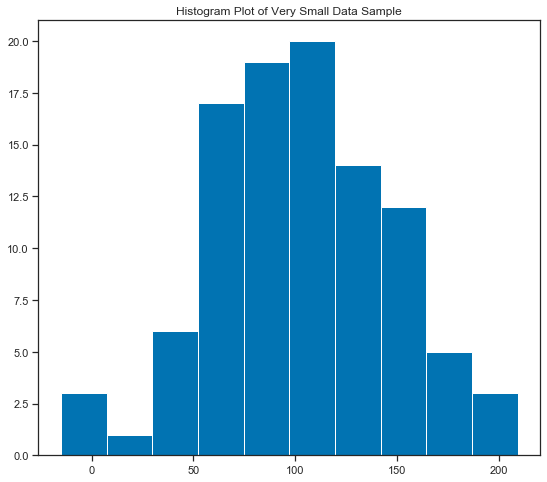

In [2]:
np.random.seed(1)
data = 50*np.random.randn(100) + 100
plt.hist(data);
plt.title("Histogram Plot of Very Small Data Sample");

Increasing the size of the sample from 50 to 100 can help to better expose the Gaussian shape of the data distribution.

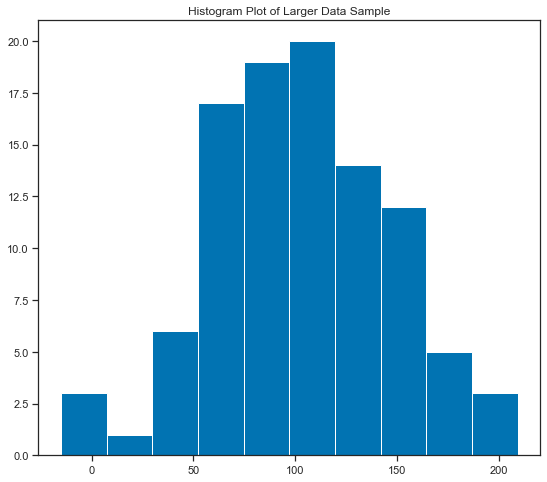

In [3]:
np.random.seed(1)
data = 50*np.random.randn(100) + 100
plt.hist(data);
plt.title("Histogram Plot of Larger Data Sample");

### 3. Data Resolution

Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample that you collect, it does not materialize.

A common reason for this is the resolution that you are using to collect the observations. The distribution of the data may be obscured by the chosen resolution of the data or the fidelity of the observations. There may be many reasons why the resolution of the data is being modified prior to modeling, such as:
- The configuration of the mechanism making the observation.
- The data is passing through a quality-control process.
- The resolution of the database used to store the data.

To make this concrete, we can make a sample of 100 random Gaussian numbers with a mean of 0 and a standard deviation of 1 and remove all of the decimal places.

In [4]:
data = np.random.randn(100)
data = data.round(0)
data[:5]

array([-0.,  1.,  0.,  1., -1.])

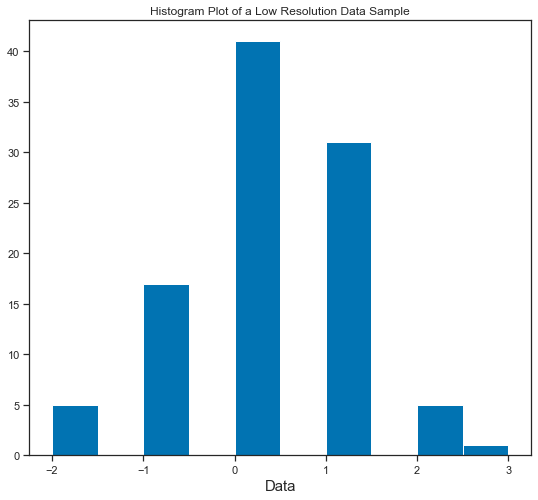

In [5]:
plt.hist(data);
plt.title("Histogram Plot of a Low Resolution Data Sample")
plt.xlabel('Data');

Running the example results in a distribution that appears discrete although Gaussian-like. Adding the resolution back to the observations would result in a fuller distribution of the data.

### 4. Extreme Values
A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.

A common reason is the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:
- Measurement error.
- Missing data.
- Data corruption.
- Rare events.

In such cases, the extreme values could be identified and removed in order to make the distribution more Gaussian. These extreme values are often called __outliers__.

This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future.

The example below creates a data sample with 100 random Gaussian numbers scaled to have a mean of 10 and a standard deviation of 5. An additional 10 zero-valued observations are then added to the distribution. This can happen if missing or corrupt values are assigned the value of zero. This is a common behavior in publicly available machine learning datasets; for example.

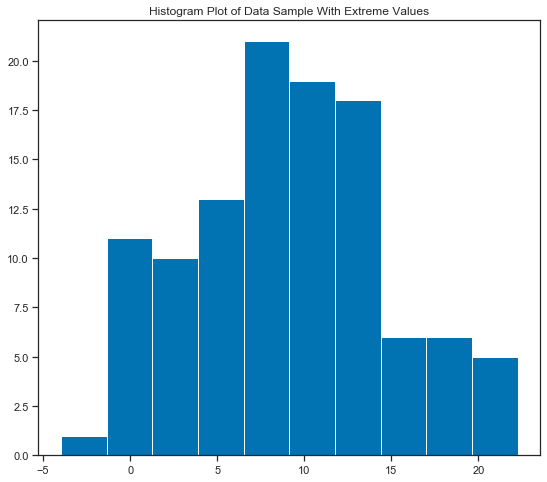

In [6]:
data = np.random.randn(100)*5 + 10
# add extreme values
data = np.append(data, np.zeros(10))
plt.hist(data);
plt.title("Histogram Plot of Data Sample With Extreme Values");
plt.show();

Running the example creates and plots the data sample. You can clearly see how __the unexpected high frequency of zero-valued observations disrupts the distribution__.

### 5. Long Tails

Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

> You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values.

We can demonstrate this with a contrived example. The data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5. An additional 50 uniformly random values in the range 10-to-110 are added. This creates a long tail on the distribution.

In [7]:
data.min(), data.max()

(-3.9654250007327008, 22.246843245306987)

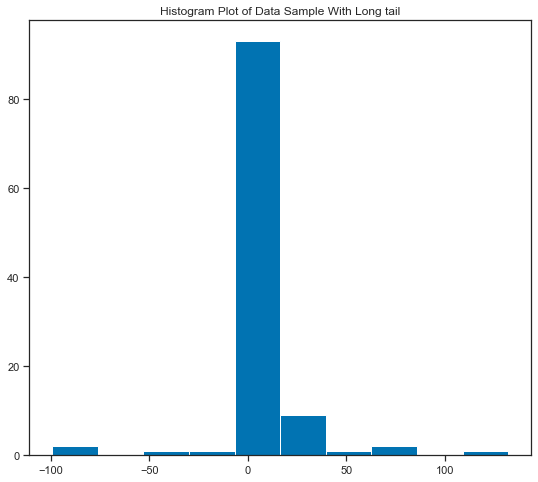

In [8]:
np.random.seed(1)
data = 5 * np.random.randn(100) + 10
tail = 10 + (np.random.randn(10) * 100)
data = np.append(data, tail)
plt.hist(data);
plt.title("Histogram Plot of Data Sample With Long tail");
plt.show();

### 6. Power Transforms

The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another. In some cases, this can be corrected by transforming the data via calculating the square root of the observations.

Alternately, the distribution may be exponential, but may look normal if the observations are transformed by taking the natural logarithm of the values. Data with this distribution is called log-normal.

To make this concrete, below is an example of a sample of Gaussian numbers transformed to have an exponential distribution.



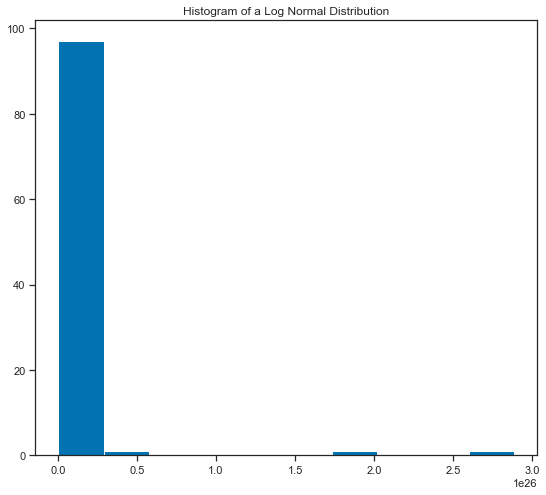

In [9]:
np.random.seed(1)
# generate two sets of univariate observations
data = 5 * np.random.randn(100) + 50
data = np.exp(data)
plt.hist(data);
plt.title("Histogram of a Log Normal Distribution");
plt.show();

Taking the square root and the logarithm of the observation in order to make the distribution normal belongs to a class of transforms called power transforms. The __Box-Cox method__ is a data transform method that is able to perform a range of power transforms, including the log and the square root.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your data sample. The resulting data sample may be more linear and will better represent the underlying non-power distribution, including Gaussian.

#### Box-Cox Transform

> [Box-cox transform scipy python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

[What is a Box Cox Transformation?](https://www.statisticshowto.com/box-cox-transformation/)
- A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
- __At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:__
    $$ y(\lambda) = \begin{cases}\frac{y^{\lambda}-1}{\lambda} & if \lambda\neq 0\\log_{10}{y} & if \lambda = 0\end{cases}$$
    
- __This test only works for positive data__

![](box-cox.PNG)

The __boxcox() SciPy function__ implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda:
- __lambda = -1__. is a reciprocal transform.
- __lambda = -0.5__ is a reciprocal square root transform.
- __lambda = 0.0__ is a log transform.
- __lambda = 0.5__ is a square root transform.
- __lambda = 1.0__ is no transform.

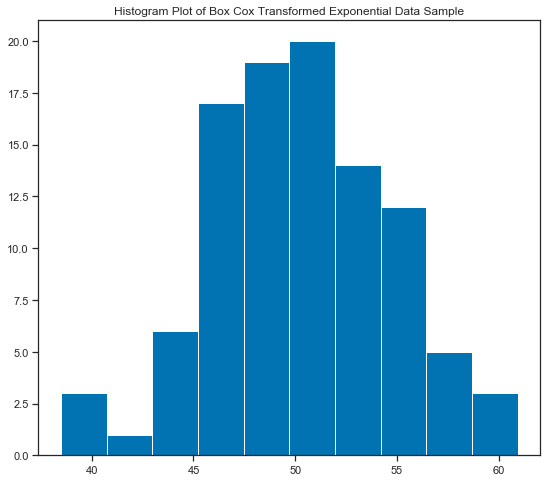

In [10]:
from scipy.stats import boxcox
# power transform
data = boxcox(data, 0)
plt.hist(data);
plt.title("Histogram Plot of Box Cox Transformed Exponential Data Sample");

> A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive. An alternative method that does not make this assumption is the __Yeo-Johnson transformation.__